Create Run Engine

In [1]:
from bluesky import RunEngine
RE = RunEngine({})

Prepare Live Visualization

In [2]:
from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

# Make plots update live while scans run.
# Running this in iPython it says that it is not longer necessary
from bluesky.utils import install_kicker
install_kicker()

NotImplementedError: The matplotlib backend module://matplotlib_inline.backend_inline is not yet supported.

Prepare Data Storage

In [3]:
from databroker import Broker
db = Broker.named('temp')

# Insert all metadata/data captured into db.
RE.subscribe(db.insert)

1

Add a Progress Bar

In [4]:
from bluesky.utils import ProgressBarManager
RE.waiting_hook = ProgressBarManager()

Read Some Detectors

In [5]:
from ophyd.sim import det1, det2  # two simulated detectors
from bluesky.plans import count
dets = [det1, det2]   # a list of any number of detectors


In [6]:
RE(count(dets))



Transient Scan ID: 1     Time: 2023-04-14 15:23:27
Persistent Unique Scan ID: '05fbed0c-e460-4ba9-8376-5c08ad6434be'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |       det2 |       det1 |
+-----------+------------+------------+------------+
|         1 | 15:23:27.9 |      1.765 |      5.000 |
+-----------+------------+------------+------------+
generator count ['05fbed0c'] (scan num: 1)





('05fbed0c-e460-4ba9-8376-5c08ad6434be',)



Transient Scan ID: 2     Time: 2023-04-14 15:23:45
Persistent Unique Scan ID: '22a5b8a4-832b-47df-8149-507fa274ddd3'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |        det |
+-----------+------------+------------+------------+
|         1 | 15:23:46.0 |     -1.000 |      0.607 |
|         2 | 15:23:46.1 |     -0.778 |      0.739 |
|         3 | 15:23:46.1 |     -0.556 |      0.857 |
|         4 | 15:23:46.2 |     -0.333 |      0.946 |
|         5 | 15:23:46.2 |     -0.111 |      0.994 |
|         6 | 15:23:46.2 |      0.111 |      0.994 |
|         7 | 15:23:46.3 |      0.333 |      0.946 |
|         8 | 15:23:46.3 |      0.556 |      0.857 |
|         9 | 15:23:46.4 |      0.778 |      0.739 |
|        10 | 15:23:46.4 |      1.000 |      0.607 |
+-----------+------------+------------+------------+
generator scan ['22a5b8a4'] (scan num: 2)





('22a5b8a4-832b-47df-8149-507fa274ddd3',)

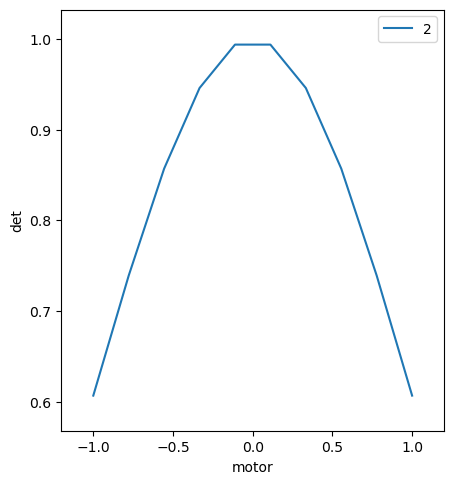

In [7]:
    from ophyd.sim import det, motor
    from bluesky.plans import scan

    dets = [det]  # just one in this case, but it could be more than one

    RE(scan(dets, motor, -1, 1, 10))